Alex Medina | ASTR 3101 | Assignment #2 - Problem #2

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import pyplot as plt

In [130]:
#Constants
L_o  = 3.846e26          #W = j/s
R_o  = 6.957e8           #m
M_o  = 1.989e30          #kg
n    = 5.17              #dimensionless, used in paper
G    = 6.6743e-11        #m^3 * kg^-1 * s^-2
g    = 274               #m/s^2 (values could not find so just chose g_o of sun)

#For M-type stars the constants are:
#For simplicity will not consider the +/- of the constants but just showing that it is possible to consider
#pm_α = np.array([+0.15, -0.15])
#pm_β = np.array([+0.14, -0.14])
#pm_γ = np.array([+1.2, -1.2])
α    = -5.64 #+ pm_α
β    = 1.05 #+ pm_β
γ    = -6.3 #+ pm_γ


From the paper, https://arxiv.org/pdf/1805.05164.pdf, we adopt the modified Reimers’ formula and the van Loon equation with all the constants used in the paper to calculate mass loss rate.

In [131]:
#Modified Reimers'formula
def dMdt(L, M):
    #return (4e-13) * n * (L/L_o) * (np.sqrt(G * M / g)/R_o) / (M/M_o) 
    #got rid of the /L_o and /M_o bc the units in the dat file are in terms of M_o, L_o
    return (4e-13) * n * (L) * (np.sqrt(G * M / g)) / (M)

#We convert Reimers' formula into a log formula so that all values are in log form
def log_dMdt_r(L, M):
    return math.log((4e-13) * n * (L) * (np.sqrt(G * M / g)) / (M))

#Van Loon Equation
def log_dMdt(L, T_eff):
    #return α + β * math.log(L / 1000 * L_o) + γ * math.log(T_eff / 3500)
    return α + β * math.log(L) + γ * math.log(T_eff)

Problem 2(A)

From the dat file: First column is mass(in terms of M_o); second column is luminosity(in terms of L_o); third column is effective temperature(in terms of K); eigth column is mass-loss rate(in terms of M_o / year)

In [132]:
#Only using specific columns from the dat file
#col_variable where col is the column and variable is mass, luminosity, temperature and mass loss rate
with open(r"mgridsol.dat") as datFile:
    col_mass = ([data.split()[0] for data in datFile])

with open(r"mgridsol.dat") as datFile:
    col_lumi = ([data.split()[1] for data in datFile])

with open(r"mgridsol.dat") as datFile:
    col_temp = ([data.split()[2] for data in datFile])

with open(r"mgridsol.dat") as datFile:
    col_mslr = ([data.split()[7] for data in datFile])

#Testing to see if the columns print the wanted values
print(col_mass)
print(col_lumi)
print(col_temp)
print(col_mslr)

['0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75', '0.75',

In [135]:
#Creating a list a values for mass loss rate according to Van Loon Equation
reimer_mslr = [None] * len(col_lumi)
for i in range(len(col_lumi)):
        reimer_mslr[i] = (log_dMdt_r(float(col_lumi[i]), float(col_mass[i])))

#Creating a list a values for mass loss rate according to Van Loon Equation(we have two bc of the plus minus in our constants)
van_loon_mslr = [None] * len(col_lumi)
for i in range(len(col_lumi)):
    van_loon_mslr[i] = (log_dMdt(float(col_lumi[i]), float(col_temp[i])))

#Since all our values are in log we also log the mass loss rate from DARWIN
DAR_mslr = [None] * len(col_mslr)
for i in range(len(col_mslr)):
        DAR_mslr[i] = (math.log(float(col_mslr[i])))

#Testing to see if values print
print(reimer_mslr)
print(van_loon_mslr)
print(DAR_mslr)

[-40.15084591129, -40.15084591129, -40.15084591129, -40.15084591129, -40.15084591129, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.103593026439455, -40.1035930

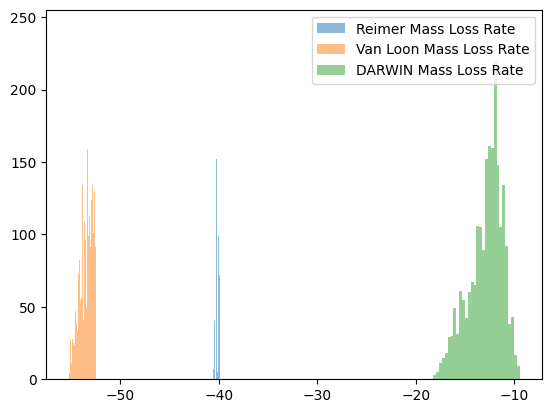

In [141]:
#Creating a histrogram for the values
x = reimer_mslr
y = van_loon_mslr
z = DAR_mslr
bins = 30

plt.hist(x, bins, alpha=0.5, label='Reimer Mass Loss Rate')
plt.hist(y, bins, alpha=0.5, label='Van Loon Mass Loss Rate')
plt.hist(z, bins, alpha=0.5, label='DARWIN Mass Loss Rate')
plt.legend(loc='upper right')
plt.show()

The Reimer and Van Loon mass loss rates are pretty close for having such different functions, perhaps because of how we log the functions. Reimer hovers around -40 and Van loon howevers around -53 while the value from the DARWIN file however around -17 so about 3 factors short of the Van loon and about 2 factors short of the Reimer equation. Yet, the Van Loon distribution seems fairly comparable to the shape of the DARWIN set where the Reimer is much smaller.

Problem 2(B)

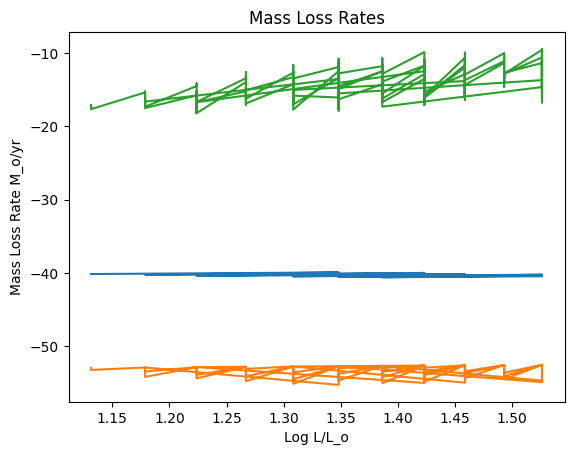

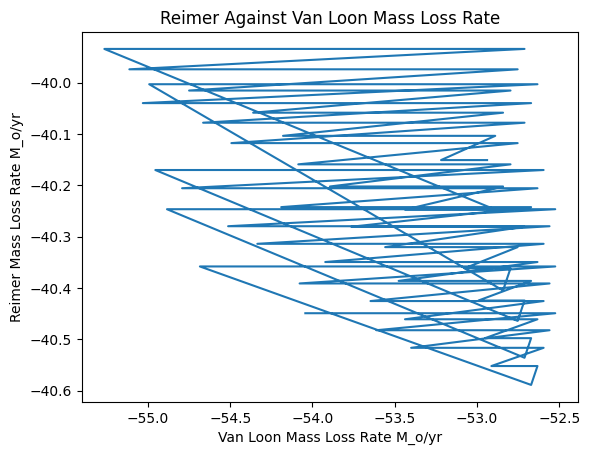

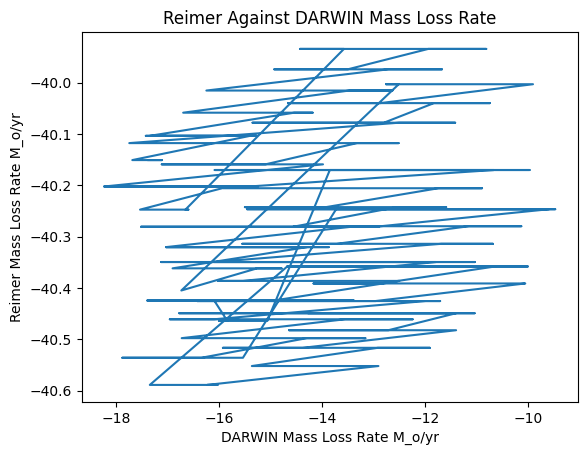

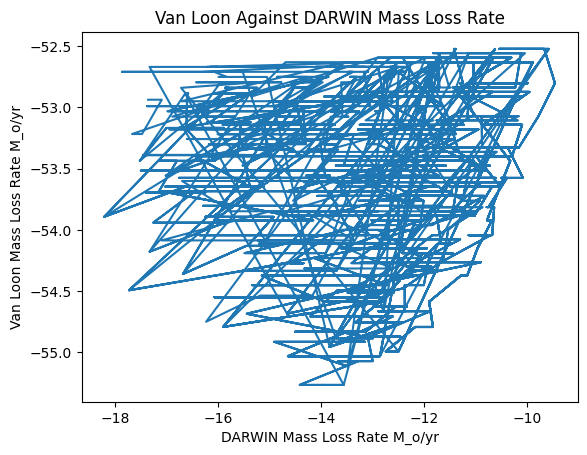

In [144]:
#Renaming the lists into variables
x_r    = reimer_mslr
x_v    = van_loon_mslr
x_DAR  = DAR_mslr
x_lumi = [None] * len(col_mslr)
for i in range(len(col_lumi)):
        x_lumi[i] = (math.log(float(col_lumi[i])))

#Mass loss rates against luminosity
plt.plot(x_lumi, x_r, label = "Reimer")
plt.plot(x_lumi, x_v, label = "Van Loon")
plt.plot(x_lumi, x_DAR, label = "DARWIN")
plt.xlabel("Log L/L_o")
plt.ylabel("Mass Loss Rate M_o/yr")
plt.title("Mass Loss Rates")
plt.show()

#i)Mass loss rate from the Reimers’ formula versus the van Loon equation
plt.plot(x_v, x_r)
plt.xlabel("Van Loon Mass Loss Rate M_o/yr")
plt.ylabel("Reimer Mass Loss Rate M_o/yr")
plt.title("Reimer Against Van Loon Mass Loss Rate")
plt.show()

#ii)The mass loss from the Reimers’ formula versus the simulation
plt.plot(x_DAR, x_r)
plt.xlabel("DARWIN Mass Loss Rate M_o/yr")
plt.ylabel("Reimer Mass Loss Rate M_o/yr")
plt.title("Reimer Against DARWIN Mass Loss Rate")
plt.show()

#iii)The mass loss rate from the van Loon equation versus the simulation 
plt.plot(x_DAR, x_v)
plt.xlabel("DARWIN Mass Loss Rate M_o/yr")
plt.ylabel("Van Loon Mass Loss Rate M_o/yr")
plt.title("Van Loon Against DARWIN Mass Loss Rate")
plt.show()